# Holt-Winters

Las técnicas de pronóstico exponencial permiten obtener aproximaciones de las series de tiempo de una manera sencialla y con buenos resultados para series no estacionarias. Esta tecnica se basa calcular cada observacion basandose en las observaciones anteriores dando un menor peso a las observaciones mas antiguas y mayor a las mas cercanas. Estas técnicas también son conocidas como técnicas de suavizado exponencial.

El proceso mas simple es el de **promedios móviles ponderados exponencialmente (EWMA)** que es equivalente a un **Suavizado exponencial simple** usando un solo factor de suavizado  **α  (alpha)** [0..1] y que no tiene en cuenta otros factores como la tendencia o la estacionalidad. Aunque esta tecnica es buena para observar graficamente la tendencia es desaconsejada para predecir nuevas observaciones mas alla de una observacion en el futuro.

En el **Suavizado exponencial doble** (también conocido como *Método de Holt*) aparece ya un factor **β (beta)** que aborda la tendencia de la serie y que permite predecir con un factor acumulativo o multiplicativo de las series la tendencia.

Con **Suavizado exponencial triple** (también conocido como *Método Holt-Winters*) presentamos un factor de suavizado  **γ  (gamma)** que representa la estacionalidad de la serie.

Los valores de **α  (alpha)**, **β (beta)**, **γ  (gamma)** mas cercanos a 1 dan mas peso a las observaciones recientes frente a las pasadas, mientras que valores cercanos a 0 acercan la predicion a la media de  los valores anteriores.

# Informacion del dataset de muestra
Ejemplo tipico de series temporales con  el conjunto de datos de Pasajeros de líneas aéreas internacionales, que proporciona totales mensuales en miles de personas desde enero de 1949 hasta diciembre de 1960.

[AirPassengers.csv](https://www.kaggle.com/datasets/rakannimer/air-passengers)

# Carga de Librerias

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Carga, limpia y preproceso de los datos

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakannimer/air-passengers")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rakannimer/air-passengers/versions/1


In [8]:
csv_data = pd.read_csv(path+"/AirPassengers.csv")

In [9]:
work_data = csv_data.copy()

In [10]:
work_data.dropna(inplace=True)

In [11]:
work_data.Month = pd.to_datetime(work_data.Month, format = "%Y-%m")
work_data.set_index("Month", inplace=True)
work_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
work_data.index.freq = 'MS'

In [13]:
work_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


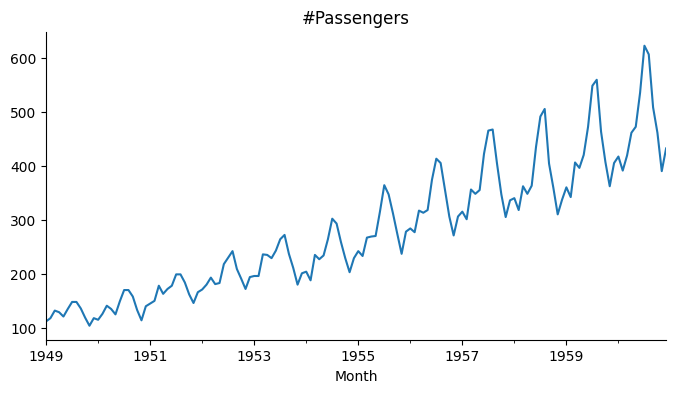

In [14]:
# @title #Passengers

from matplotlib import pyplot as plt
work_data['#Passengers'].plot(kind='line', figsize=(8, 4), title='#Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# Calcular el índice de división
train_size = int(len(work_data) * 0.9)  # 90% para entrenamiento
work_data_train = work_data.iloc[:train_size]   # Conjunto de entrenamiento
work_data_test = work_data.iloc[train_size:]     # Conjunto de prueba


# Suavizado exponencial simple


In [16]:
# Factor alfa que no es obligatorio, se puede calcular de manera inversa y el span representa "algo parecido" a la estacionalidad.
span = 12
alpha = 2/(span+1)

work_data_train['EWMA_12'] = work_data_train['#Passengers'].ewm(alpha=alpha,adjust=False).mean()
autoSES=SimpleExpSmoothing(work_data_train['#Passengers']).fit()
work_data_train['SES']=autoSES.fittedvalues
print("SES Calculated Smooted: " + str(autoSES.params['smoothing_level']))
work_data_train['SES_12']=SimpleExpSmoothing(work_data_train['#Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
work_data_train.head()

SES Calculated Smooted: 0.9999999850988388


<ipython-input-16-cdabb1e8274f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data_train['EWMA_12'] = work_data_train['#Passengers'].ewm(alpha=alpha,adjust=False).mean()
<ipython-input-16-cdabb1e8274f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data_train['SES']=autoSES.fittedvalues
<ipython-input-16-cdabb1e8274f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,#Passengers,EWMA_12,SES,SES_12
Month,,,,
1949-01-01,112,112.000000,112.0,112.000000
1949-02-01,118,112.923077,112.0,112.923077
1949-03-01,132,115.857988,118.0,115.857988
1949-04-01,129,117.879836,132.0,117.879836
1949-05-01,121,118.359861,129.0,118.359861


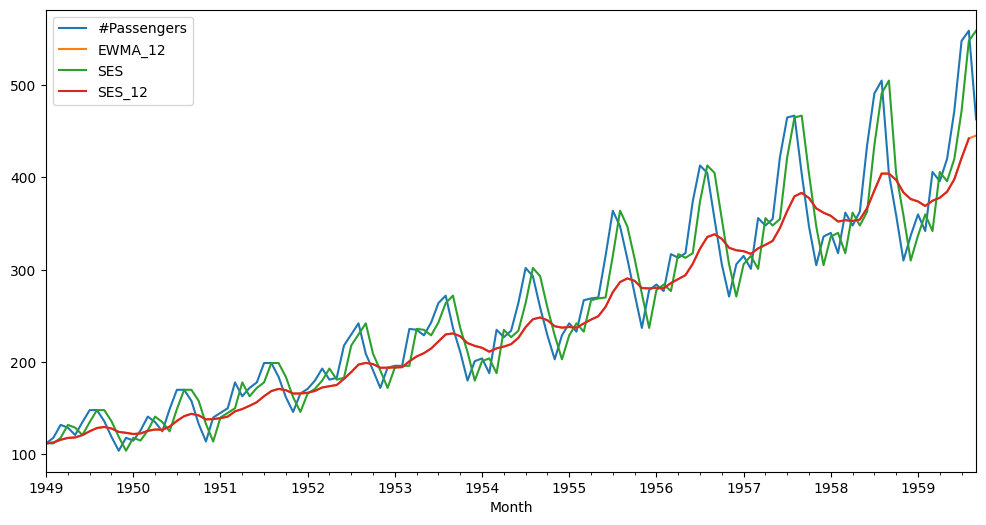

In [17]:
work_data_train[['#Passengers','EWMA_12','SES','SES_12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

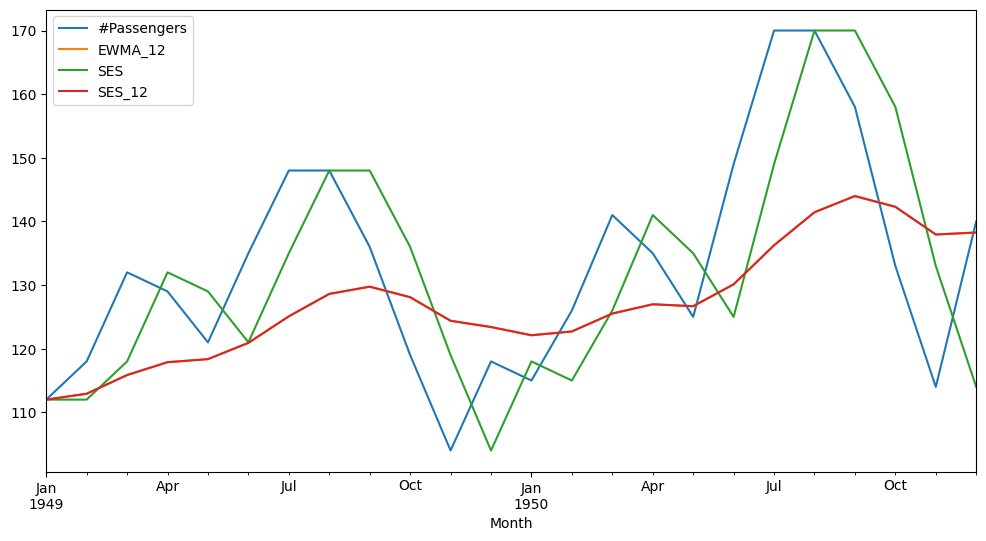

In [18]:
work_data_train[['#Passengers','EWMA_12','SES','SES_12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Suavizado exponencial doble
Este modelo tiene como entrada dos tipos de crecimiento, un crecimiento **aditivo**, para series que asemejan a un crecimiento lineal y **multiplicativo** para series que asemejan un crecimiento exponencial.


In [19]:
work_data_train['DESadd'] = ExponentialSmoothing(work_data_train['#Passengers'], trend = 'add').fit().fittedvalues.shift(-1)
work_data_train['DESmul'] = ExponentialSmoothing(work_data_train['#Passengers'], trend = 'mul').fit().fittedvalues.shift(-1)

<ipython-input-19-7319c3007b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data_train['DESadd'] = ExponentialSmoothing(work_data_train['#Passengers'], trend = 'add').fit().fittedvalues.shift(-1)
<ipython-input-19-7319c3007b3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data_train['DESmul'] = ExponentialSmoothing(work_data_train['#Passengers'], trend = 'mul').fit().fittedvalues.shift(-1)


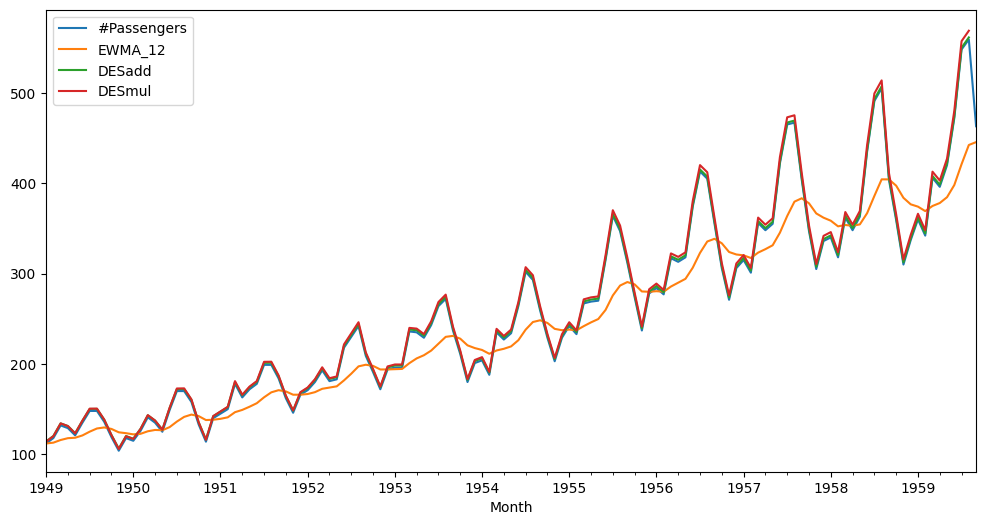

In [20]:
work_data_train[['#Passengers','EWMA_12','DESadd','DESmul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

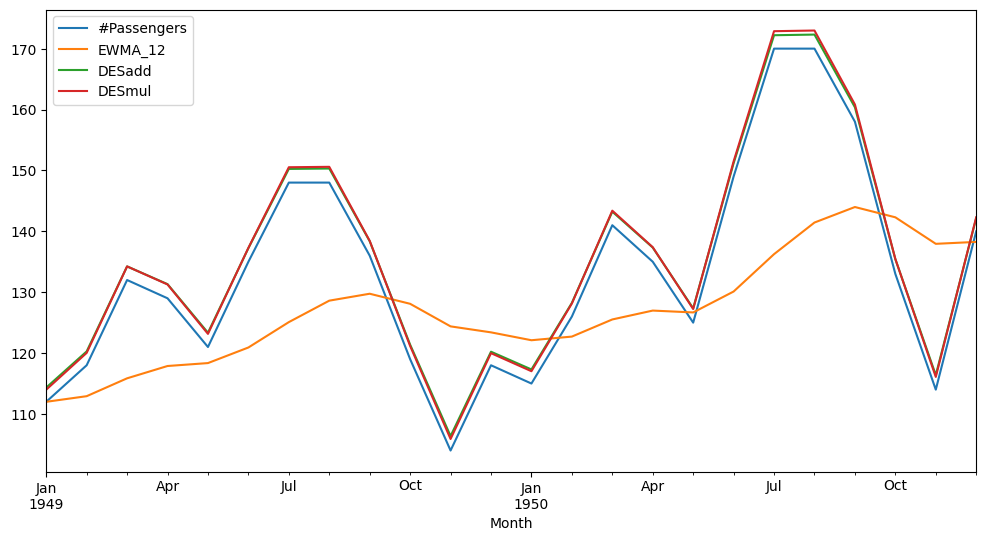

In [21]:
work_data_train[['#Passengers','EWMA_12','DESadd','DESmul']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Suavizado exponencial triple
Suavizado exponencial triple o *Holt-Winters*, inclye tambien la estacionalida que tambien puede ser de tipo **acumulativo** o **exponencial**.



In [22]:
work_data_train['TESaddadd12'] = ExponentialSmoothing(work_data_train['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
work_data_train['TESaddmul12'] = ExponentialSmoothing(work_data_train['#Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues
work_data_train['TESmuladd12'] = ExponentialSmoothing(work_data_train['#Passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues
work_data_train['TESmulmul12'] = ExponentialSmoothing(work_data_train['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues


<ipython-input-22-263d732bba2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data_train['TESaddadd12'] = ExponentialSmoothing(work_data_train['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
<ipython-input-22-263d732bba2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_data_train['TESaddmul12'] = ExponentialSmoothing(work_data_train['#Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues
/usr/local/lib/python3.10/dist-packages/statsm

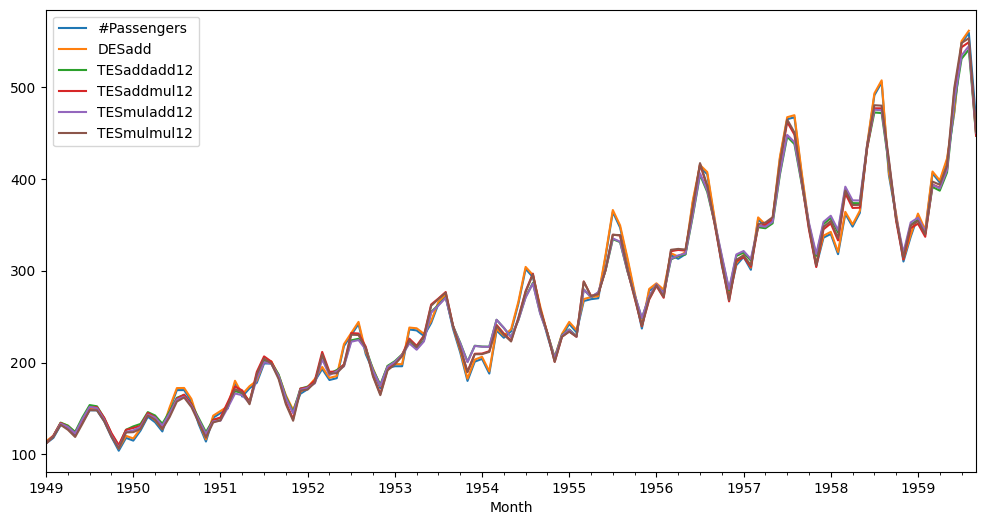

In [23]:
work_data_train[['#Passengers','DESadd','TESaddadd12','TESaddmul12','TESmuladd12','TESmulmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

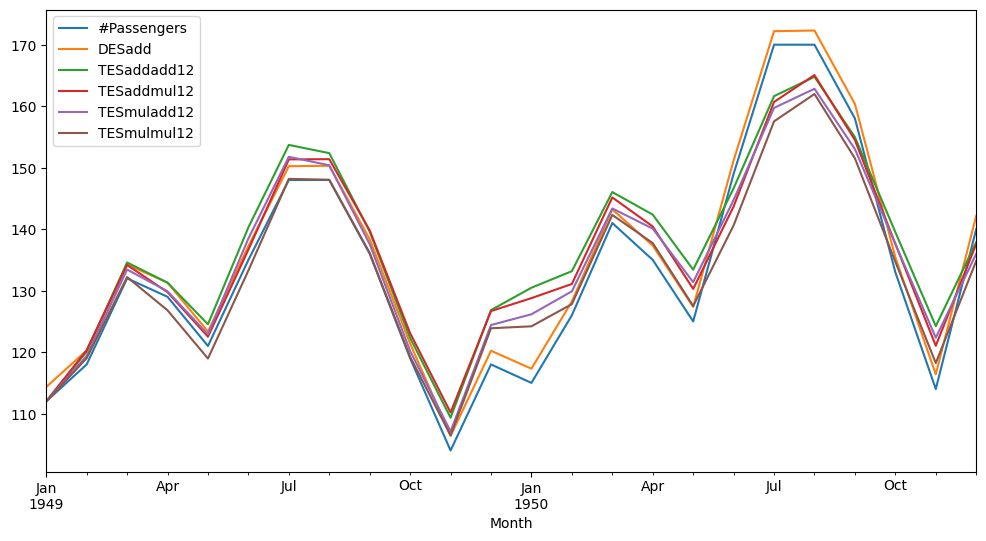

In [24]:
work_data_train[['#Passengers','DESadd','TESaddadd12','TESaddmul12','TESmuladd12','TESmulmul12']].iloc[:24].plot(figsize=(12,6));

In [25]:
model_add_add = ExponentialSmoothing(work_data_train['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
model_add_mul = ExponentialSmoothing(work_data_train['#Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit()
model_mul_add = ExponentialSmoothing(work_data_train['#Passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit()
model_mul_mul = ExponentialSmoothing(work_data_train['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
model_add = ExponentialSmoothing(work_data_train['#Passengers'], trend = 'add').fit()
model_ = SimpleExpSmoothing(work_data_train['#Passengers']).fit(smoothing_level=alpha,optimized=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [26]:
forecast_add_add = model_add_add.forecast(36)
forecast_add_mul = model_add_mul.forecast(36)
forecast_mul_add= model_mul_add.forecast(36)
forecast_mul_mul= model_mul_mul.forecast(36)
forecast_add= model_add.forecast(36)
forecast_= model_.forecast(36)

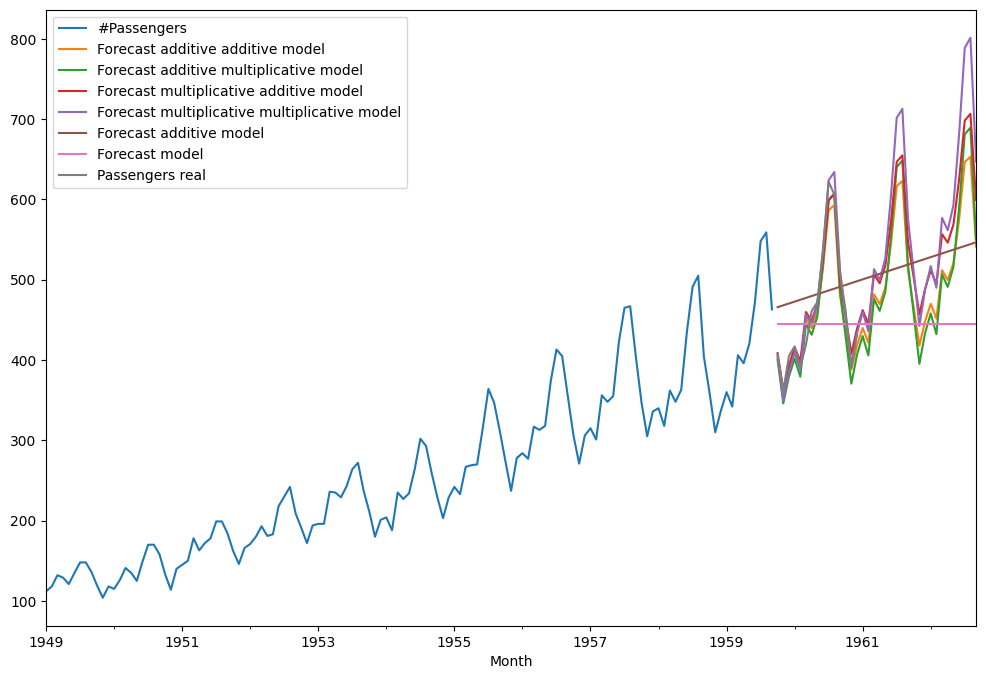

In [27]:
work_data_train['#Passengers'].plot(figsize=(12,8))
forecast_add_add.plot(label='Forecast additive additive model');
forecast_add_mul.plot(label='Forecast additive multiplicative model');
forecast_mul_add.plot(label='Forecast multiplicative additive model');
forecast_mul_mul.plot(label='Forecast multiplicative multiplicative model');
forecast_add.plot(label='Forecast additive model');
forecast_.plot(label='Forecast model');
work_data_test['#Passengers'].plot(label='Passengers real')
plt.legend(loc='upper left')

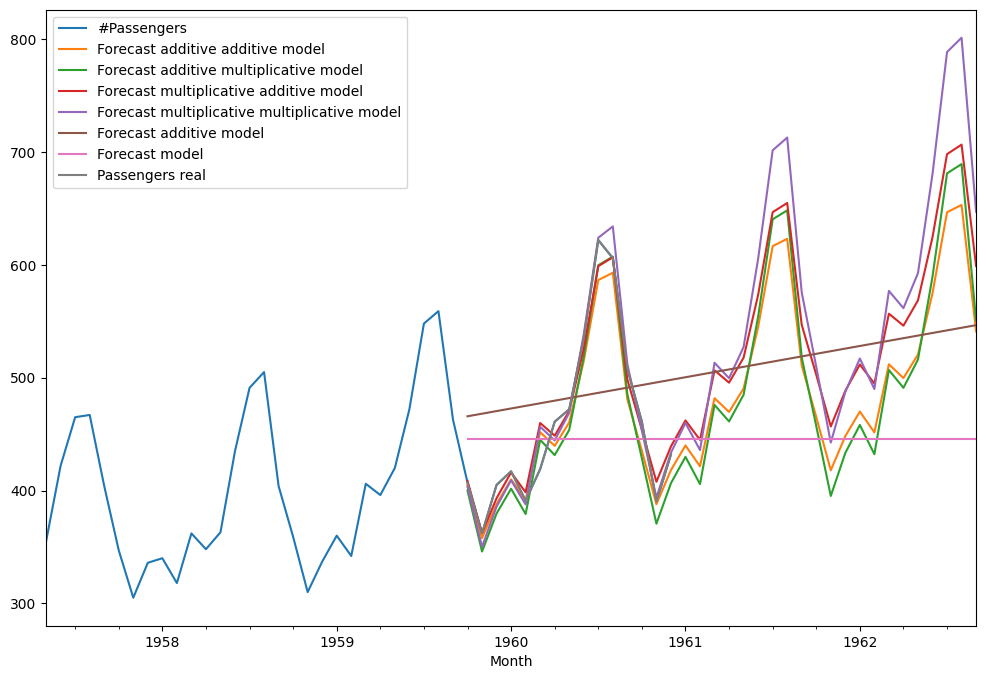

In [28]:
work_data['#Passengers'].iloc[100:].plot(figsize=(12,8))
forecast_add_add.plot(label='Forecast additive additive model');
forecast_add_mul.plot(label='Forecast additive multiplicative model');
forecast_mul_add.plot(label='Forecast multiplicative additive model');
forecast_mul_mul.plot(label='Forecast multiplicative multiplicative model');
forecast_add.plot(label='Forecast additive model');
forecast_.plot(label='Forecast model');
work_data_test['#Passengers'].plot(label='Passengers real')
plt.legend(loc='upper left')